# PolyCRACKER Tutorial - Running the Pipeline

Hey there. My name is Joshua Levy and I would like to welcome you to the first tutorial in a series of tutorials about how to run polyCRACKER.

Shown below is the flow diagram for the polyCRACKER pipeline. 

In order to run this pipeline, you'll need to:
0) Set up folders and move fasta file to correct location.
1) Specify a config file.
2) Launch a run via the command line interface.
3) Check some of the run outputs to make sure it's running appropriately.

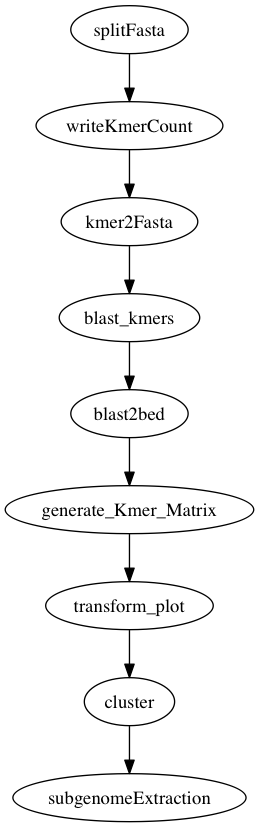

In [14]:
import networkx as nx, pygraphviz as pgv
import matplotlib.pyplot as plt
from IPython.display import Image

G = nx.DiGraph(directed=True)
nodes = ['splitFasta','writeKmerCount','kmer2Fasta','blast_kmers','blast2bed','generate_Kmer_Matrix','transform_plot','cluster','subgenomeExtraction']
G.add_edges_from([(nodes[i],nodes[i+1]) for i in range(len(nodes)-1)])
nx.drawing.nx_agraph.write_dot(G,'multi.dot')
Image(pgv.AGraph('multi.dot').draw(format='png', prog='dot'))

# 0) Set up run directory

1) Download and install the anaconda environment https://anaconda.org/jlevy44/polyCRACKER/files .
2) Clone the polyCRACKER git repository into your run directory.
3) Copy or move the target fasta file to the fasta_files folder of the run directory.

# 1) Specify a config:

Posted below is an example of what would go into a configuration file:



Make sure that the file name of your fasta file is included in this config, not the path. A config will be copied to your directory when you clone polyCRACKER's repo. If you are wondering what all of these parameters are, please see my tutorial on selecting the right parameters for a polyCRACKER run.

# 2) Run polyCRACKER's pipeline via the command line

In order to run polyCRACKER, type in the following command:

python polyCRACKER.py run_pipeline -h

This will bring up the command's doc string to help get you started. When you have the right settings selected, run the pipeline as outlined in the command's help text.

# 3) Make sure the pipeline is running correctly.

This pipeline is modular, as outlined by the process diagram above. It's broken into key commands, and the configuration file can help you turn them on or off as you rerun the pipeline by setting them to 1 or 0 in the config respectively. Alternatively, each module/command in the pipeline is able to be run by itself using the command line interface. Visit our help docs that describe each function for additional information on how to use them.

That being said, once you learn how to specify the right configuration options, you may need to stop the pipeline to readjust. 

Here are some areas that may need to be rerun more frequently:
* transform_plot
    * This function transforms a count matrix of scaffolds vs k-mers into a lower dimensional space that describes the scaffolds. A plot describing the final transformed data can be found in a file with the naming scheme main_*_Reduction.html. If it doesn't look right, change the transform config parameters and rerun the pipeline, selecting the other config commands to be 0 before transform. Alternatively, you can run transform_plot in the commandline interface via python polyCRACKER.py transform_plot -h , though make sure to move any html file before you run this.
* cluster
    * This function clusters this dimensionality reduced data. Once again, change the config options if you don't see what you like after looking at html files with the scheme *main_*ClusterTest.html and remove those html files before rerunning. Alternatively, python polyCRACKER.py cluster -h . After looking at the html plot and some of the folders from the next step, you may realize that the incorrect clusters were grabbed for the analysis. Use the command cluster_exchange to remedy this.
* subgenomeExtraction
    * This propagates the final binning labels for the chunks in the final fasta file via a bootstrap iterative process. To find the results, go to analysisOutputs, then to a folder with a naming scheme that matches some of the options that you specified in the config. 
    * Clustering results are saved in ClusterResults, and the clusters that polyCRACKER thinks should be propagated are sent to the folder bootstrap_0 as txt files. For each bootstrap* folder, results are saved in fasta format in the subdirectory extractedSubgenomes, and their txt files containing the propagated scaffold names in certain bins are sent to the next level bootstrap folder. The final txt results are saved in finalResults in the same directory as clusterResults.
    * You can manually extract the fasta file bins from the text files using the command txt2fasta. 
    * Debug this step using plot_unionbed on any unionbed files in these directories, or use convert_subgenome_output_to_pickle and plotPositions to plot these results in a PCA graph. 
    * Note that the best results may be stored in any one of the bootstrap directories. You can look for a good run by looking at the subgenomes.unionbed file, until a better metric is established to tell which bootstrap is the best.

# 4) There are downstream/other analyses.

See my tutorial on downstream analyses for tips on how to run more complicated analyses. TODO.

# 5) Description of each configuration parameter

# polyCRACKER configuration file

# file paths
blastPath = directory where sam/bam files stored for repeat k-mers being mapped to chunked genome  
kmercountPath = directory containing counts of repeat-mers throughout genome  
fastaPath = directory containing input fasta file, only file needed to run polyCRACKER!  
bedPath = directory containing bed files from blast/bbmap results; may possibly be deprecated  

# genome
genome = fasta file name, do not give full path, only filename inside fastaPath  

# sge interpreter
slurm = whether to submit jobs to slurm
local = whether to run job locally, always keep this selected, python polyCRACKER.py run_pipeline handles submission   script

# blast or bbtools // deprecated
BB = always set to 1, run bbmap because blast is slow  

# recommended practice, number of dimensions > number of subgenomes
n_subgenomes = number of subgenomes to look for, no automatic detection method, so if studying tetraploid, may want to set this to 2  
n_dimensions = number of dimensions should generally, but not always be set at a value at or greater than number of subgenomes, but must be greater than 3, this is for dimensions to reduce fragments by kmer count matrix to  

# split fasta into chunks
splitFasta = set equal to 1 when first running pipeline, "chunks" fasta file into fragments  
preFilter = only set this to 1 if using a very large genome, maybe larger than wheat, attempts to save memory, must be set with lowMemory = 1 as well  
splitFastaLineLength = length of "chunks"/fragments, recommend setting them to a size large enough to capture enough repeat-k-mers, may need to look at N50 of assembly to get idea  

# write kmer counts and convert to fasta file to be blasted
writeKmer = always set to 1 when first running pipeline, finds repeat-mers throughout genome by counting kmers  
kmerLength = length of kmer to query, can use multiple by comma delimiting, generally larger genomes/assemblies/scaffolds can handle larger kmer sizes  
kmer2Fasta = always set to 1 when first running, write kmers to fasta file to be blasted against chunked genome  
kmer_low_count = kmers must be present more than this many times to be included in the analysis  
use_high_count = whether to place an upper bound restriction on kmer frequency for inclusion, activates kmer_high_count when set to 1  
kmer_high_count = kmers must be present less than this frequency to be included in analysis  
sampling_sensitivity = setting equal to 1 includes all kmers, setting to higher value includes fewer kmers, sampled, number of kmers remaining is (kmers-kmers that fail thresholds above)/sampling_sensitivity, good for high memory issues and time  

# use original genome for final analysis output?
original = instead of binning chunks into subgenomes, bin all scaffolds included in original fasta file if set to 1  

# blast and generate bed files, turning bed files into clustering matrix, specified memory usage options, and remove chunks
writeBlast = set to 1 when first running pipeline, map kmers against chunked genome and find sam output  
k_search_length = set between 8-13, 8 is a finer search, may pick up more kmers but is slower, this value must be less than kmer length  
runBlastParallel = set to 0, no need to use this  
blastMemory = amount of memory in GB to use when running bbmap  
blast2bed = set to 1 when first running pipeline, convert bbmap output to bed file and merge bed file to find kmers for each subsequence  
generateClusteringMatrix = set to 1 when first running pipeline, turn merged bed file into sparse matrix of fragments vs kmers, kmer counts  
lowMemory = only set to 1 if want to use less memory, will process files over 3-5 times slower, not recommended  
minChunkSize = filter the matrix by genome chunked fragments greater than a certain length  
removeNonChunk = set equal to one if only wanting to consider chunks of splitFastaLineLength length for matrix, can be useful if many of the chunks are smaller than splitFastaLineLength, as this will strongly skew clustering results
minChunkThreshold = if 1, activates minChunkSize  
tfidf = try tfidf normalization if set to 1, treating kmers as words, common NLP type trick, not recommended, but can work in some cases  
perfect_mode = if set to one, find even more kmers in genome by approximater matches, maybe small mutations, this introduces additional signal for the kmer count matrix, may be useful  

# transform and cluster the data
transformData = set to 1 when first running pipeline, dimensionality reduce kmer count matrix to n_dimensions  
reduction_techniques = can comma delimit different techniques, tsne and kpca are common ones, dimensionality reduction technique, may add UMAP in future because of high effectiveness for high dimensions, may outperform tsne  
transformMetric = generally set to linear or cosine, for kpca kernel  
ClusterAll = set to 1 when first running pipeline, clusters dimensionality reduced data to perform initial binning  
clusterMethods = can comma delimit, clustering technique, BGMM and SpectralClustering best results, but there are other techniques  
grabAllClusters = only set to one if you can see that clusters are well differentiated, or that there is not some large collection of some ambiguous points close to the center, easier to set if using tsne  
n_neighbors = number of neighbors for k-nn graph for SpectralClustering, 10-25 is a good setting  
metric = distance metric to use for clustering, generally euclidean and cosine perform the best  
weighted_nn = set to 1 if weighting nearest neighbors graph by distance, not recommended  
mst = set to one if combining nearest neighbors graph with minimum spanning tree, generally not recommended unless nearest neighbor graph lacks connectivity and that crashes algorithm  

# extract the subgenomes
extract = set to 1 if hoping to perform signal amplification/additional extraction, if cluster results are not sufficient, use differential kmer signal found from clusters and previous signal amplification bootstraps to recruit additional fragments/subsequences to subgenomes, recommended if chunked assembly has many subsequences significantly smaller than splitFastaLineLength  
diff_kmer_threshold = recruit differential kmers if these kmers appear this times more often in one subgenome versus the other subgenomes at each cluster/bootstrap/amplification step  
default_kmercount_value = if number of kmers are zero in one subgenome versus others, set to default value above 0, set this equal to integer greater than 1, 1-3 is good range, used for calculations by above parameter  
diff_sample_rate = setting equal to 1 includes all differential kmers, setting to higher value includes fewer kmers, sampled, just like sampling_sensitivity but for identification of differential kmers  
unionbed_threshold = Comma delimited, first value is number of times greater total differential repeat-mer counts are in one subgenome versus all others in order to make decision to bin fragment to subgenome, second value is default value if counts in one subgenome is 0 for calculations involving previous parameter eg. 10,2  
bootstrap = number of times to perform signal amplication, recruits differential kmers and uses those to bin the subsequences to subgenomes, then recruit more differential kmers, repeat this number of times specified here, good to set between 1 and 5 and can look at intermediate results  

# Endnote: Sample Configuration Files
Below are a collection of sample configurations that were used to produce the results for the polyCRACKER paper, some of the options are deprecated, but the Aspergillus new config contains all of the latest options:

In [ ]:
# Aspergillus new:

# polyCRACKER configuration file

# file paths
blastPath = ./blast_files/
kmercountPath = ./kmercount_files/
fastaPath = ./fasta_files/
bedPath = ./bed_files/

# genome
genome = fungi.fa

# sge interpreter
slurm = 0
local = 1

# blast or bbtools // deprecated
BB = 1

# recommended practice, number of dimensions > number of subgenomes
n_subgenomes = 4
n_dimensions = 4

# split fasta into chunks
splitFasta = 0
preFilter = 0
splitFastaLineLength = 100000

# write kmer counts and convert to fasta file to be blasted
writeKmer = 0
kmerLength = 11
kmer2Fasta = 0
kmer_low_count = 5
use_high_count = 0
kmer_high_count = 2000000
sampling_sensitivity = 1

# use original genome for final analysis output?
original = 0

# blast and generate bed files, turning bed files into clustering matrix, specified memory usage options, and remove chunks
writeBlast = 0
k_search_length = 8
runBlastParallel = 0
blastMemory = 100
blast2bed = 0
generateClusteringMatrix = 0
lowMemory = 0
minChunkSize = 50000
removeNonChunk = 1
minChunkThreshold = 0
tfidf = 0
perfect_mode = 0

# transform and cluster the data
transformData = 0
reduction_techniques = tsne
transformMetric = cosine
ClusterAll = 1
clusterMethods = BGMM
grabAllClusters = 1
n_neighbors = 10
metric = yule
weighted_nn = 0
mst = 1

# extract the subgenomes
extract = 1
diff_kmer_threshold = 8
default_kmercount_value = 2
diff_sample_rate = 1
unionbed_threshold = 10,2
bootstrap = 1
